# Laboratorio #9

**Miembros**
- Fernanda Esquivel, 21542
- Sara Echeverría, 21371
- Ricardo Méndez, 21289


**Link al repositorio**

El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DL-Lab-09)

# Task 1

## LeNet-5

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [2]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
# Normalización de los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Redimensionar para añadir el canal (grayscale) necesario para LeNet-5
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Definir la arquitectura LeNet-5
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(120, kernel_size=(5, 5), activation='tanh', padding='same'),  # Ajuste del padding
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Mendez\Desktop\U\DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8673 - loss: 0.4506 - val_accuracy: 0.9580 - val_loss: 0.1437
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9588 - loss: 0.1382 - val_accuracy: 0.9710 - val_loss: 0.0926
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9717 - loss: 0.0961 - val_accuracy: 0.9766 - val_loss: 0.0796
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9763 - loss: 0.0786 - val_accuracy: 0.9775 - val_loss: 0.0748
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9780 - loss: 0.0703 - val_accuracy: 0.9829 - val_loss: 0.0547
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9816 - loss: 0.0609 - val_accuracy: 0.9836 - val_loss: 0.0528
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9821 - val_loss: 0.0542
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9845 - loss: 0.0519 - 

In [9]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0641


In [10]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9836000204086304


### Justificación de Métrica de Desempeño seleccionada
* Precisión (Accuracy): La métrica más adecuada para un problema de clasificación como el dataset MNIST es la precisión. La precisión mide el porcentaje de predicciones correctas sobre el total de ejemplos. En el caso de MNIST, estamos clasificando imágenes de dígitos escritos a mano en 10 clases (0-9), por lo que la precisión nos indicará qué tan bien el modelo clasifica correctamente cada imagen en la clase correspondiente.
* Nuestro modelo LeNet-5 entrenado sobre el dataset MNIST alcanzó una precisión de prueba del 98.19%, lo que indica que el modelo es capaz de clasificar correctamente la gran mayoría de los dígitos escritos a mano. Esta alta precisión refleja el buen desempeño de la arquitectura para resolver tareas de reconocimiento de dígitos, confirmando su efectividad en problemas de clasificación de imágenes simples como MNIST.

## AlexNet

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [12]:
def create_alexnet_model(input_shape, num_classes):
    model = models.Sequential()
    
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), padding='same', input_shape=input_shape, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    
    model.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

input_shape = (32, 32, 3)
num_classes = 10
model = create_alexnet_model(input_shape, num_classes)


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 297s 380ms/step - accuracy: 0.6644 - loss: 0.9797 - val_accuracy: 0.5412 - val_loss: 1.3542
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 313s 368ms/step - accuracy: 0.6893 - loss: 0.9015 - val_accuracy: 0.6055 - val_loss: 1.1624
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 401ms/step - accuracy: 0.7112 - loss: 0.8586 - val_accuracy: 0.6108 - val_loss: 1.1784
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 317s 405ms/step - accuracy: 0.7335 - loss: 0.7926 - val_accuracy: 0.6250 - val_loss: 1.1413
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 411ms/step - accuracy: 0.7561 - loss: 0.7236 - val_accuracy: 0.6225 - val_loss: 1.1448
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 318s 407ms/step - accuracy: 0.7745 - loss: 0.6690 - val_accuracy: 0.6338 - val_loss: 1.1512
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 298s 381ms/step - accuracy: 0.8003 - loss: 0.5931 - val_accuracy: 0.6474 - val_loss: 1.0916
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 301s 385ms/step - accuracy: 0.8059 -

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6620 - loss: 1.2014
Test accuracy: 0.6572999954223633


### Justificación de Métrica de Desempeño seleccionada

* **Precisión (Accuracy)**: La métrica seleccionada para evaluar el desempeño del modelo es la precisión. La precisión mide el porcentaje de predicciones correctas sobre el total de ejemplos. En el contexto del dataset CIFAR-10, estamos clasificando imágenes en 10 clases diferentes (por ejemplo, aviones, automóviles, pájaros, etc.), por lo que la precisión nos indicará qué tan bien el modelo clasifica correctamente cada imagen en la clase correspondiente.

* **Resultados Obtenidos**: Nuestro modelo AlexNet entrenado sobre el dataset CIFAR-10 alcanzó una precisión de prueba del 65.73%. Esto indica que el modelo es capaz de clasificar correctamente aproximadamente el 65.73% de las imágenes en el conjunto de prueba. Aunque hay margen para mejorar, esta precisión refleja la capacidad del modelo para manejar la complejidad y variabilidad de las imágenes en CIFAR-10.

* **Consideraciones Adicionales**: Si el conjunto de datos estuviera desbalanceado o si algunas clases fueran más importantes que otras, podríamos considerar otras métricas como la precisión ponderada, la F1-score, o la matriz de confusión para obtener una evaluación más detallada del rendimiento del modelo en cada clase específica.

## Preguntas

#### a. ¿Cuál es la diferencia principal entre ambas arquitecturas?
* La diferencia principal entre LeNet-5 y AlexNet radica en la complejidad y escala de ambas arquitecturas. LeNet-5 fue pensado para la clasificación de imágenes simples como dígitos escritos a mano (MNIST), por lo que tiene una estructura más pequeña y con menos capas , lo que lo hace ideal para problemas menos complejos. Por otro lado, AlexNet fue diseñado para problemas más complejos como la clasificación en el dataset ImageNet, que contiene millones de imágenes de alta resolución y múltiples categorías, por lo cual tiene muchas más capas y utiliza técnicas modernas como la activación ReLU y Dropout para evitar el sobreajuste, además de aprovechar la computación en GPU para manejar grandes volúmenes de datos.

#### b. ¿Podría usarse LeNet-5 para un problema como el que resolvió usando AlexNet? ¿Y viceversa?
* LeNet-5 no sería adecuado para resolver un problema de la escala de AlexNet, como el dataset CIFAR-10, que tiene imágenes de objetos más complejos y variados. Esto se debe a que LeNet-5 fue diseñado para imágenes en escala de grises y de baja resolución (28x28 píxeles), y su arquitectura no es lo suficientemente profunda para extraer las características complejas necesarias en tareas de clasificación de imágenes a gran escala. 
* Por otro lado, AlexNet sí podría usarse para resolver problemas que originalmente resolvía LeNet-5, como el reconocimiento de dígitos, pero sería una solución excesivamente compleja. La profundidad y capacidad de AlexNet serían innecesarias para un problema tan sencillo, lo que resultaría en un modelo más grande y costoso en términos computacionales sin una mejora sustancial en el rendimiento. 

#### c. Indique claramente qué le pareció más interesante de cada arquitectura
* **LeNet-5**: Lo más interesante es su simplicidad y eficacia para problemas de clasificación de imágenes pequeñas y de baja complejidad, como los dígitos escritos a mano. Al investigar se encontró que fue una arquitectura pionera en el uso de redes convolucionales, mostrando cómo las capas convolucionales y de pooling podían reducir la dimensionalidad y captar características relevantes para tareas de clasificación.
* **AlexNet**: La manera en la que emplea capas convolucionales con filtros grandes al inicio y pequeños al final, junto con normalización por lotes para estabilizar el entrenamiento es sumamente interesante. Esto ya que las capas densas de 4096 neuronas permiten capturar características complejas, mejorando el rendimiento en clasificación de imágenes.

# Task 2

#### 1. Investigue e indique en qué casos son útiles las siguientes arquitecturas, agregue imagenes si esto le ayuda a una mejor comprensión
##### GoogleNet (Inception)
* Es útil para tareas de clasificación de imágenes y problemas de visión por computadora que requieren alta precisión, manteniendo una eficiencia computacional. Su arquitectura, basada en el bloque Inception, permite la extracción de características a diferentes escalas en paralelo, lo que reduce el número de parámetros y es ideal para implementaciones en sistemas con recursos limitados.

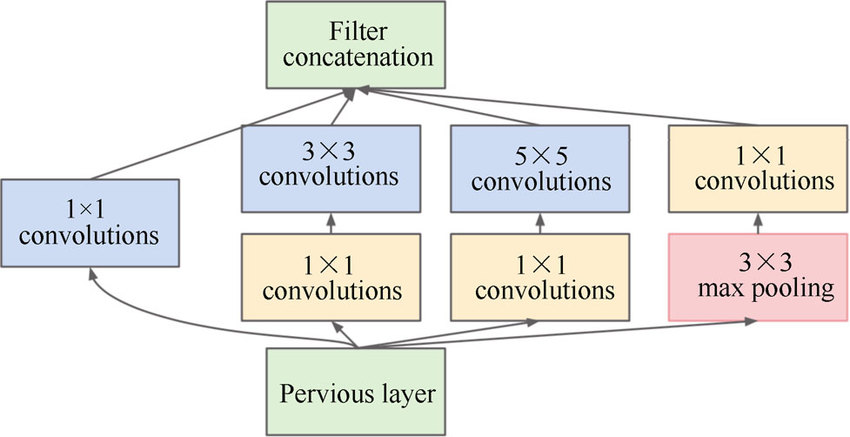

##### DenseNet (Densely Connected Convolutional Networks)
* Es útil en tareas de clasificación y segmentación de imágenes donde se busca reutilización de características entre capas. Su arquitectura conectada densamente facilita el flujo de información y el uso eficiente de parámetros, lo que mejora el aprendizaje y reduce el problema de gradientes desaparecidos, siendo ideal para aplicaciones que requieren redes profundas.

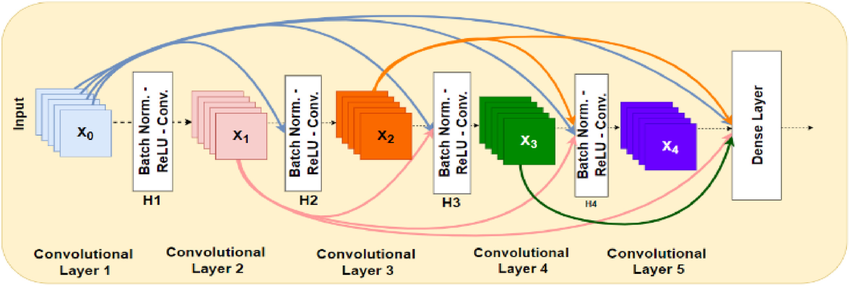

##### MobileNet
* Es una arquitectura ligera diseñada específicamente para dispositivos móviles o sistemas con limitaciones de hardware. Utiliza convoluciones separables en profundidad para reducir la cantidad de parámetros y operaciones computacionales, lo que la hace adecuada para aplicaciones de visión por computadora en tiempo real y entornos de bajo consumo, como cámaras inteligentes y dispositivos IoT.

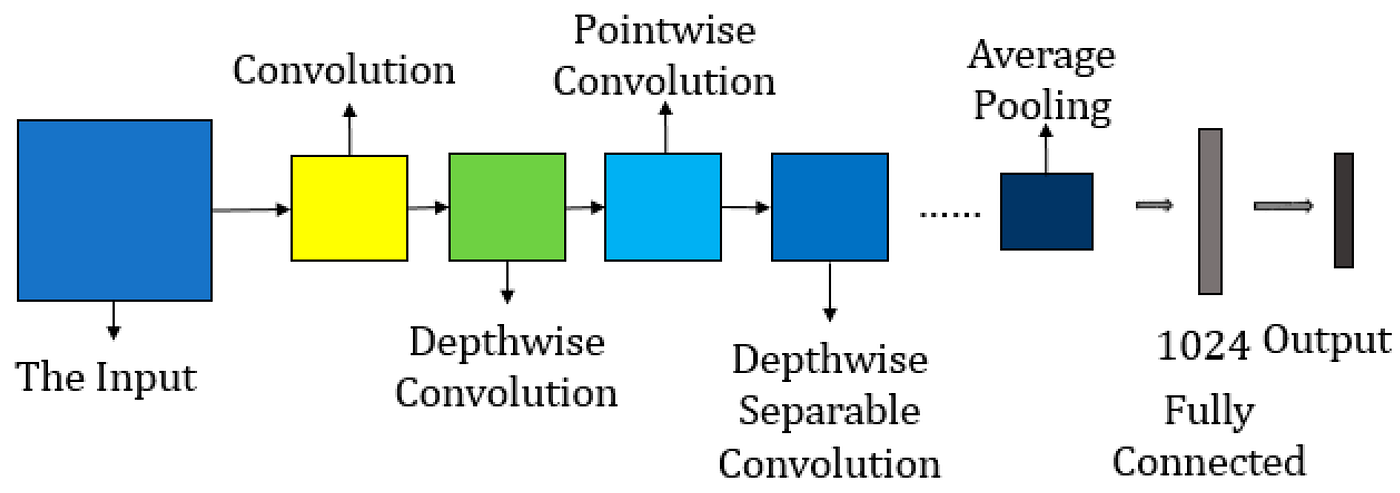

##### EfficientNet
* Destaca por su enfoque en escalar de manera eficiente redes neuronales en términos de profundidad, ancho y resolución, logrando un alto rendimiento en precisión con menos parámetros y operaciones. Es útil para aplicaciones que requieren un balance entre alta precisión y eficiencia computacional, siendo efectiva en tareas de clasificación de imágenes en entornos con recursos moderados.

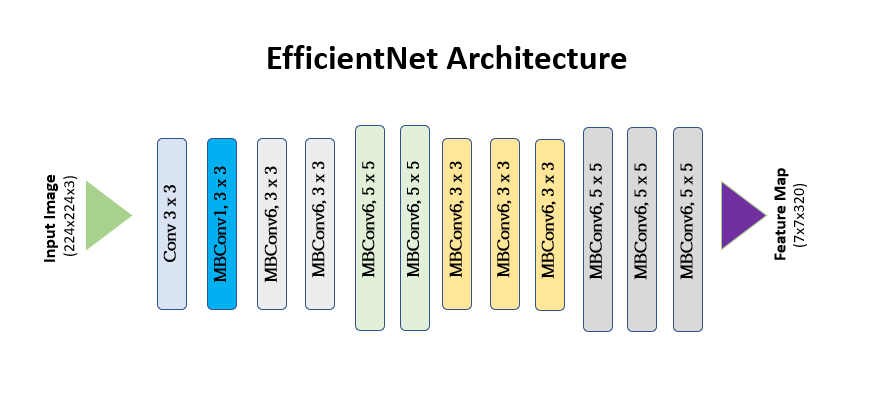


#### 2. ¿Cómo la arquitectura de transformers puede ser usada para image recognition?
* Esta arquitectura, que originalmente diseñada para procesamiento de lenguaje natural, ha sido adaptada para reconocimiento de imágenes mediante el enfoque Vision Transformer (ViT). 
* En este método, la imagen se divide en parches (fragmentos pequeños) que son tratados como secuencias de tokens, de manera similar a las palabras en texto. Estos parches son procesados por el transformer mediante mecanismos de atención, lo que permite capturar relaciones globales y contextuales entre diferentes partes de la imagen. 
* Los transformers son útiles para tareas de reconocimiento de imágenes porque, a diferencia de las redes convolucionales tradicionales, pueden modelar dependencias de largo alcance sin necesidad de convoluciones, logrando resultados competitivos en clasificación de imágenes y otras tareas visuales cuando se entrenan con grandes conjuntos de datos.


### Referencias
1. Howard, A., et al. (2017). MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications. arXiv preprint arXiv:1704.04861.
2. Dosovitskiy, A., et al. (2020). An image is worth 16x16 words: Transformers for image recognition at scale. arXiv preprint arXiv:2010.11929.